# Task 1

Link to the datasets: https://arielacil-my.sharepoint.com/:u:/g/personal/rand_ariel_ac_il/EbcKOLRNLExFvxcOCpESGLMBRlP1f5WhX9EIpZJ7qAXi9g?e=tAycKc

**Dataset_1** - The most basic API traffic containing the least number of attacks and endpoints. Will basically enable to have a soft start. 

```
Dataset 1 baseline score:

                   precision    recall  f1-score   support

    Benign          0.95715   0.93922   0.99792       480
    Malware         0.99799   0.94129   0.96881       528
    
    accuracy                            0.96825      1008
    macro avg       0.96860   0.96960   0.96824      1008
    weighted avg    0.97000   0.96825   0.96827      1008

```

# Cisco - Ariel University API Security Detection Challenge 2023
## Baseline code


### Imports and global settings

In [986]:
# Imports, settings and first dataset view
from sklearn.svm import SVC
import pandas as pd
import seaborn as sns
import numpy as np
import json

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter

from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.decomposition import TruncatedSVD

import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as ps
import matplotlib.pyplot as plt
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.templates['plotly_dark'].layout.autosize = False
pio.templates['plotly_dark'].layout.width = 1_000
pio.templates['plotly_dark'].layout.height = 800

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import StackingClassifier

import pickle

# from ipywidgets import widgets

# Set pandas to show all columns when you print a dataframe
pd.set_option('display.max_columns', None)

# Global setting here you choose the dataset number and classification type for the model
dataset_number = 1  # Options are [1, 2, 3, 4]
test_type = 'label'  # Options are ['label', 'attack_type']

# Read the json and read it to a pandas dataframe object, you can change these settings
with open(f'./dataset_{str(dataset_number)}_train.json') as file:
    raw_ds = json.load(file)
df = pd.json_normalize(raw_ds, max_level=2)

# Shoe the first five lines of the dataframe to see if everything was read accordingly
df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,request.Attack_Tag,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.headers.Cookie,response.headers.Location,request.headers.Content-Length,response.headers.Set-Cookie
0,127.0.0.1:5000,Mozilla/5.0 (X11; Linux i586; rv:31.0) Gecko/2...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=o_GpTr9HHJJuQyahzYzRI32s-1_JPvkhLtweRRmjP...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/static/download_txt/../....,,Directory Traversal,200 OK,application/json,72,200,"{""error"": ""File ../../../../../../../../window...",NaN,NaN,NaN,NaN
1,127.0.0.1:5000,Mozilla/5.0 (X11; OpenBSD amd64; rv:28.0) Geck...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=UYrrg74Ph7dWrlCA9rgXy6qtYSwxuCZK_nBsCp-j5...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2467,,NaN,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",NaN,NaN,NaN,NaN
2,127.0.0.1:5000,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:24....,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=wiMIulyT7VOEQKT-4D5ChZAjxiTdRXAYUaz_OQ3Rc...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/cookielogin,,Cookie Injection,200 OK,text/html; charset=utf-8,105,200,<h1>Logged in as Cedric</h1><form method='POST...,username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhb...,NaN,NaN,NaN
3,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; rv:27.3) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=pQiHhJSsvZ9vw-yR8NmaTGKzqUBsn583t3Q6zWEoz...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/states/get/region/6117,,NaN,404 NOT FOUND,application/json,30,404,"{""error"": ""Not a region""}",NaN,NaN,NaN,NaN
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:25...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document${jndi:ldaphttps://mitsui-jyuku.mixh.j...,['ck=vGDsymCRgtDms448zxnOurIjvy46d_4aAGJRG6gmh...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2508,,LOG4J,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",NaN,NaN,NaN,NaN


### Basic dataset label arrangements

In [987]:
# Fill the black attack tag lines with "Benign" string
df['request.Attack_Tag'] = df['request.Attack_Tag'].fillna('Benign')
df['attack_type'] = df['request.Attack_Tag']

# This function will be used in the lambda below to iterate over the label columns
# You can use this snippet to run your own lambda on any data with the apply() method


def categorize(row):
    if row['request.Attack_Tag'] == 'Benign':
        return 'Benign'
    return 'Malware'


df['label'] = df.apply(lambda row: categorize(row), axis=1)

# After finishing the arrangements we delete the irrelevant column
df.drop('request.Attack_Tag', axis=1, inplace=True)

df

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.headers.Cookie,response.headers.Location,request.headers.Content-Length,response.headers.Set-Cookie,attack_type,label
0,127.0.0.1:5000,Mozilla/5.0 (X11; Linux i586; rv:31.0) Gecko/2...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=o_GpTr9HHJJuQyahzYzRI32s-1_JPvkhLtweRRmjP...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/static/download_txt/../....,,200 OK,application/json,72,200,"{""error"": ""File ../../../../../../../../window...",NaN,NaN,NaN,NaN,Directory Traversal,Malware
1,127.0.0.1:5000,Mozilla/5.0 (X11; OpenBSD amd64; rv:28.0) Geck...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=UYrrg74Ph7dWrlCA9rgXy6qtYSwxuCZK_nBsCp-j5...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2467,,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",NaN,NaN,NaN,NaN,Benign,Benign
2,127.0.0.1:5000,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:24....,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=wiMIulyT7VOEQKT-4D5ChZAjxiTdRXAYUaz_OQ3Rc...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/cookielogin,,200 OK,text/html; charset=utf-8,105,200,<h1>Logged in as Cedric</h1><form method='POST...,username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhb...,NaN,NaN,NaN,Cookie Injection,Malware
3,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; rv:27.3) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=pQiHhJSsvZ9vw-yR8NmaTGKzqUBsn583t3Q6zWEoz...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/states/get/region/6117,,404 NOT FOUND,application/json,30,404,"{""error"": ""Not a region""}",NaN,NaN,NaN,NaN,Benign,Benign
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:25...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document${jndi:ldaphttps://mitsui-jyuku.mixh.j...,['ck=vGDsymCRgtDms448zxnOurIjvy46d_4aAGJRG6gmh...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2508,,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",NaN,NaN,NaN,NaN,LOG4J,Malware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,127.0.0.1:5000,Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537....,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.5",none,websocket,?1,document,['ck=wKm-iDQeCXGjwXGrGJvfzWzs5VYbnWSP75B6BjFz1...,"Mon, 21 Nov 2022 18:39:51 GMT",POST,http://127.0.0.1:5000/cookielogin,,302 FOUND,text/html; charset=utf-8,211,302,<!doctype html>\n<html lang=en>\n<title>Redire...,username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhb...,/cookielogin,0,username=gASVKgAAAAAAAACMCF9fbWFpbl9flIwGUGVyc...,Cookie Injection,Malware
4278,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=oyXTP1KfNdMwWb_jIYEQYKzE9RZALsuCGCtJtUlju...,"Mon, 21 Nov 2022 18:39:51 GMT",GET,http://127.0.0.1:5000/orders/get/id/7668,,404 NOT FOUND,application/json,36,404,"{""error"": ""Order ID not found""}",NaN,NaN,NaN,NaN,Benign,Benign
4279,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=bfYOeMnpxlFA9F7ObPemhCXYmeYNbBteewfAWbnfy...,"Mon, 21 Nov 2022 18:39:52 GMT",POST,http://127.0.0.1:5000/cookielogin,,302 FOUND,text/html; charset=utf-8,211,302,<!doctype html>\n<html lang=en>\n<title>Redire...,username=gASVyAAAAAAAAACMCGJ1aWx0aW5zlIw

In [988]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   request.headers.Host             4282 non-null   object
 1   request.headers.User-Agent       4282 non-null   object
 2   request.headers.Accept-Encoding  4282 non-null   object
 3   request.headers.Accept           4282 non-null   object
 4   request.headers.Connection       4282 non-null   object
 5   request.headers.Accept-Language  4282 non-null   object
 6   request.headers.Sec-Fetch-Site   4282 non-null   object
 7   request.headers.Sec-Fetch-Mode   4282 non-null   object
 8   request.headers.Sec-Fetch-User   4282 non-null   object
 9   request.headers.Sec-Fetch-Dest   4282 non-null   object
 10  request.headers.Set-Cookie       4282 non-null   object
 11  request.headers.Date             4282 non-null   object
 12  request.method                   4

In [989]:
list_of_nan_for_more_than_90 = []
for col in df.columns:
    if df[col].isna().sum() / df.shape[0] * 100 > 90:
        list_of_nan_for_more_than_90.append(col)
        print(f"Column {col} has {df[col].isna().sum()} NaN values, which is {round(df[col].isna().sum() / df.shape[0] * 100, 2)}%, and has {df[col].nunique()} unique values")

Column response.headers.Location has 3881 NaN values, which is 90.64%, and has 2 unique values
Column request.headers.Content-Length has 3983 NaN values, which is 93.02%, and has 1 unique values
Column response.headers.Set-Cookie has 3983 NaN values, which is 93.02%, and has 1 unique values


In [990]:
# Remove all NAN columns or replace with desired string
# This loop iterates over all of the column names which are all NaN
for column in df.columns[df.isna().any()].tolist():
    # df.drop(column, axis=1, inplace=True)
    df[column] = df[column].fillna('None')

# If you want to detect columns that may have only some NaN values use this:
# df.loc[:, df.isna().any()].tolist()

df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.headers.Cookie,response.headers.Location,request.headers.Content-Length,response.headers.Set-Cookie,attack_type,label
0,127.0.0.1:5000,Mozilla/5.0 (X11; Linux i586; rv:31.0) Gecko/2...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=o_GpTr9HHJJuQyahzYzRI32s-1_JPvkhLtweRRmjP...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/static/download_txt/../....,,200 OK,application/json,72,200,"{""error"": ""File ../../../../../../../../window...",None,None,None,None,Directory Traversal,Malware
1,127.0.0.1:5000,Mozilla/5.0 (X11; OpenBSD amd64; rv:28.0) Geck...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=UYrrg74Ph7dWrlCA9rgXy6qtYSwxuCZK_nBsCp-j5...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2467,,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",None,None,None,None,Benign,Benign
2,127.0.0.1:5000,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:24....,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=wiMIulyT7VOEQKT-4D5ChZAjxiTdRXAYUaz_OQ3Rc...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/cookielogin,,200 OK,text/html; charset=utf-8,105,200,<h1>Logged in as Cedric</h1><form method='POST...,username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhb...,None,None,None,Cookie Injection,Malware
3,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; rv:27.3) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=pQiHhJSsvZ9vw-yR8NmaTGKzqUBsn583t3Q6zWEoz...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/states/get/region/6117,,404 NOT FOUND,application/json,30,404,"{""error"": ""Not a region""}",None,None,None,None,Benign,Benign
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:25...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document${jndi:ldaphttps://mitsui-jyuku.mixh.j...,['ck=vGDsymCRgtDms448zxnOurIjvy46d_4aAGJRG6gmh...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2508,,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",None,None,None,None,LOG4J,Malware


In [991]:
# Detect columns that have the same value for all rows and print them
from collections import Counter
for column in df.columns:
    if len(Counter(df[column])) == 1:
        print(column)

request.headers.Host
request.headers.Accept
request.headers.Connection
request.headers.Sec-Fetch-User
request.body


In [992]:
# Setting features for further feature extraction by choosing columns
# Some will be "simply" encoded via label encoding and others with HashingVectorizer

# On these headers we will run a "simple" BOW
SIMPLE_HEADERS = ['request.headers.Accept-Encoding',
                  'request.headers.Host',
                  'request.method',
                  'request.headers.Accept-Language',
                  'request.headers.Sec-Fetch-Site',
                  'request.headers.Sec-Fetch-Mode',
                  'request.headers.Sec-Fetch-Dest',
                  'response.status',
                  ]

# On these headers we will run HashingVectorizer
COMPLEX_HEADERS = ['request.headers.User-Agent',
                   'request.headers.Set-Cookie',
                   'request.headers.Date',
                   'request.url',
                   'response.headers.Content-Type',
                   'response.body',
                   'response.headers.Location',
                   'request.headers.Content-Length',
                   'request.headers.Cookie',
                   'response.headers.Set-Cookie'
                   ]

COLUMNS_TO_REMOVE = ['request.body',
                     'response.headers.Content-Length',
                     'request.headers.Date',
                     'request.headers.Accept',
                     'request.headers.Connection',
                     'request.headers.Sec-Fetch-User',
                     ]

# This is our main preprocessing function that will iterate over all of the chosen
# columns and run some feature extraction models


def vectorize_df(df):
    le = LabelEncoder()
    h_vec = HashingVectorizer(n_features=4)

    # Run LabelEncoder on the chosen features
    for column in SIMPLE_HEADERS:
        df[column] = le.fit_transform(df[column])

    # Run HashingVectorizer on the chosen features
    for column in COMPLEX_HEADERS:
        newHVec = h_vec.fit_transform(df[column])
        df[column] = newHVec.todense()

    # Remove some columns that may be needed.. (Or not, you decide)
    for column in COLUMNS_TO_REMOVE:
        df.drop(column, axis=1, inplace=True)
    return df

df = vectorize_df(df)
df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.method,request.url,response.status,response.headers.Content-Type,response.status_code,response.body,request.headers.Cookie,response.headers.Location,request.headers.Content-Length,response.headers.Set-Cookie,attack_type,label
0,0,-0.632456,0,1,0,0,0,-0.786334,0,0.000000,0,-1.0,200,0.000000,-1.000000,-1.0,-1.0,-1.0,Directory Traversal,Malware
1,0,-0.632456,0,0,0,0,0,-0.786146,0,0.000000,4,-1.0,404,0.000000,-1.000000,-1.0,-1.0,-1.0,Benign,Benign
2,0,-0.800000,0,0,0,0,0,-0.751646,0,1.000000,0,-1.0,200,0.436436,-0.408248,-1.0,-1.0,-1.0,Cookie Injection,Malware
3,0,-0.516398,0,1,0,0,0,-0.716002,0,0.894427,4,-1.0,404,0.577350,-1.000000,-1.0,-1.0,-1.0,Benign,Benign
4,0,0.377964,0,0,0,0,29,-0.691095,0,0.000000,4,-1.0,404,0.000000,-1.000000,-1.0,-1.0,-1.0,LOG4J,Malware


In [993]:
# Memory check (For large datasets sometimes the dataframe will exceed the computers resources)
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   request.headers.Host             4282 non-null   int64  
 1   request.headers.User-Agent       4282 non-null   float64
 2   request.headers.Accept-Encoding  4282 non-null   int64  
 3   request.headers.Accept-Language  4282 non-null   int64  
 4   request.headers.Sec-Fetch-Site   4282 non-null   int64  
 5   request.headers.Sec-Fetch-Mode   4282 non-null   int64  
 6   request.headers.Sec-Fetch-Dest   4282 non-null   int64  
 7   request.headers.Set-Cookie       4282 non-null   float64
 8   request.method                   4282 non-null   int64  
 9   request.url                      4282 non-null   float64
 10  response.status                  4282 non-null   int64  
 11  response.headers.Content-Type    4282 non-null   float64
 12  response.status_code

In [994]:
# Choose the right features
# In our example code we choose all the columns as our feature this can be the right or wrong way to approach the model, you choose.

features_list = df.columns.to_list()
features_list.remove('label')
features_list.remove('attack_type')
print(features_list)

# Recheck all datatype before training to see we don't have any objects in our features
# In this example our model must get features containing only numbers so we recheck to see if we missed anything during preprocessing
df.dtypes

['request.headers.Host', 'request.headers.User-Agent', 'request.headers.Accept-Encoding', 'request.headers.Accept-Language', 'request.headers.Sec-Fetch-Site', 'request.headers.Sec-Fetch-Mode', 'request.headers.Sec-Fetch-Dest', 'request.headers.Set-Cookie', 'request.method', 'request.url', 'response.status', 'response.headers.Content-Type', 'response.status_code', 'response.body', 'request.headers.Cookie', 'response.headers.Location', 'request.headers.Content-Length', 'response.headers.Set-Cookie']


request.headers.Host                 int64
request.headers.User-Agent         float64
request.headers.Accept-Encoding      int64
request.headers.Accept-Language      int64
request.headers.Sec-Fetch-Site       int64
request.headers.Sec-Fetch-Mode       int64
request.headers.Sec-Fetch-Dest       int64
request.headers.Set-Cookie         float64
request.method                       int64
request.url                        float64
response.status                      int64
response.headers.Content-Type      float64
response.status_code                 int64
response.body                      float64
request.headers.Cookie             float64
response.headers.Location          float64
request.headers.Content-Length     float64
response.headers.Set-Cookie        float64
attack_type                         object
label                               object
dtype: object

# NOT SURE AREA

##### START

In [995]:
# # Feature selection
# from sklearn.feature_selection import RFECV
# from sklearn.model_selection import StratifiedKFold

# # Split the data to train and test
# X_train, X_test, y_train, y_test = train_test_split(df[features_list], df[test_type], test_size=0.2, random_state=42)

# # Create the RFE object and compute a cross-validated score.
# # The "accuracy" scoring is proportional to the number of correct classifications
# rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=StratifiedKFold(2), scoring='accuracy')
# rfecv.fit(X_train, y_train)

# print("Optimal number of features : %d" % rfecv.n_features_)
# print('Selected features: %s' % list(X_train.columns[rfecv.support_]))

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
# plt.show()

In [996]:
# Data exploration
def plot_pie_chart(df, column_name):
    fig = px.pie(df, values=column_name, names=column_name)
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

In [997]:
plot_pie_chart(df, 'label')

##### END

In [998]:
ss = StandardScaler()

In [999]:
pca = PCA(n_components=2)

In [1000]:
# x_after_pca_in_2D=pca.fit_transform(df[features_list].to_numpy())
x_after_pca_in_2D = pca.fit_transform(ss.fit_transform(df[features_list].to_numpy()))

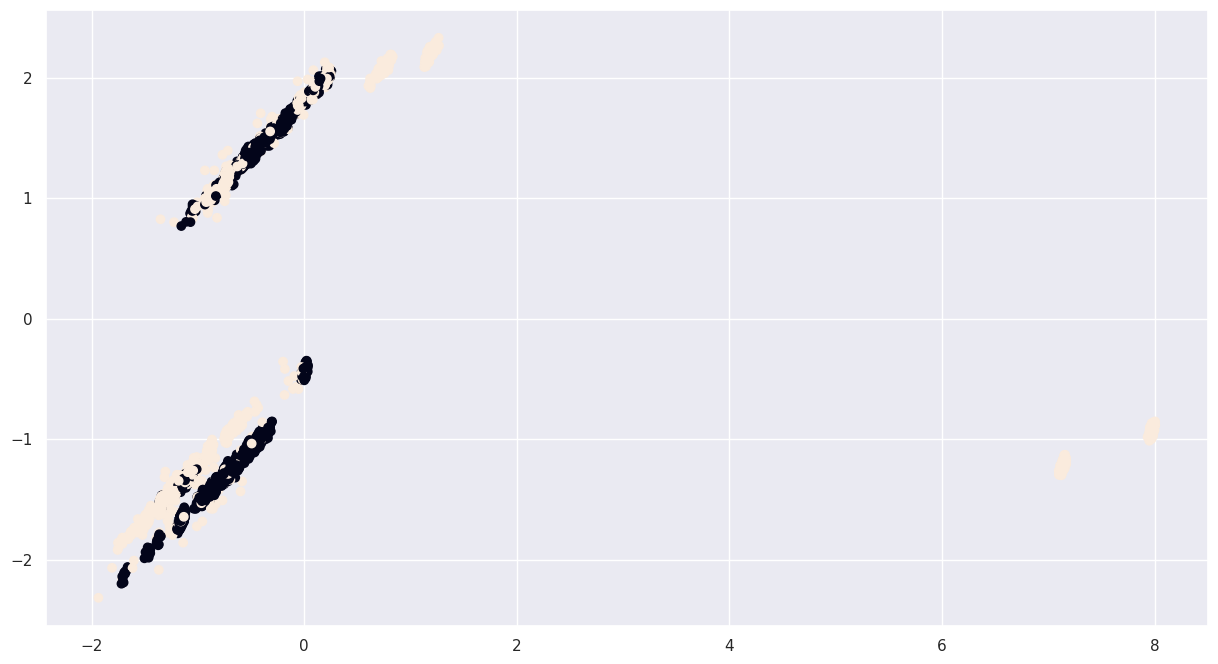

In [1001]:
plt.scatter(x_after_pca_in_2D[:, 0], x_after_pca_in_2D[:, 1], c=df['label'].map({'Benign': 0, 'Malware': 1}))

In [1002]:
pca = PCA()
pca.fit(ss.fit_transform(df[features_list].to_numpy()))

exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"},
    range_y=(0.98, 1.02),
    title="SVD Explained Variance Ratio"
)

As we can see we can compress the data into 14 components without loosing any information.

## Train test split

In [1003]:
# Data train and test split preparations. Here we will insert our feature list and label list.
# Afterwards the data will be trained and fitted on the amazing XGBoost model
# X_Train and y_Train will be used for training
# X_test and y_test.T will be used for over fitting checking and overall score testing

# We convert the feature list to a numpy array, this is required for the model fitting
X = df[features_list]#.to_numpy()

# This column is the desired prediction we will train our model on
y = np.stack(df[test_type])

# We split the dataset to train and test according to the required ration
# Do not change the test_size -> you can change anything else
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1765, random_state=42, stratify=y)

# We print the resulted datasets and count the difference
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
counter = Counter(y)
counter

(3526, 18) (3526,)
(756, 18) (756,)


Counter({'Malware': 2264, 'Benign': 2018})

In [1004]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [1005]:
pca = PCA(14)
pca.fit(X_train)
# x_train_pca = pca.transform(X_train)
x_train_pca_real = pca.transform(X_train)
x_train_pca = X_train

In [1006]:
# x_test_pca = pca.transform(X_test)
x_test_pca_real = pca.transform(X_test)
x_test_pca = X_test

In [1007]:
def plot_feature_importance(model):
    plt.figure(figsize=(10, 10))
    plt.title("Feature importances")
    plt.barh(range(x_train_pca.shape[1]), model.feature_importances_, align="center")
    plt.yticks(np.arange(x_train_pca.shape[1]), features_list)
    plt.ylim([-1, x_train_pca.shape[1]])
    plt.show()

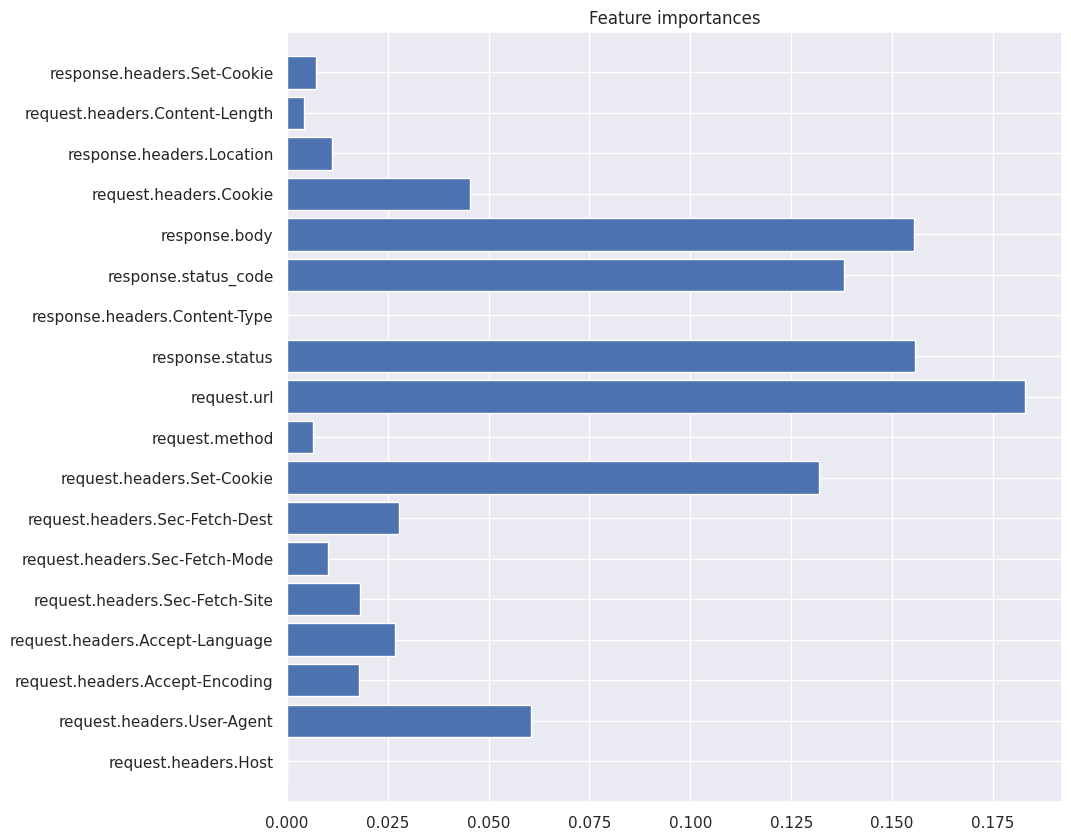

In [1008]:
# Feature selection with Random Forest Classifier

rfc_fs = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_fs.fit(x_train_pca, y_train)

# Plot the feature importances of the forest
plot_feature_importance(rfc_fs)

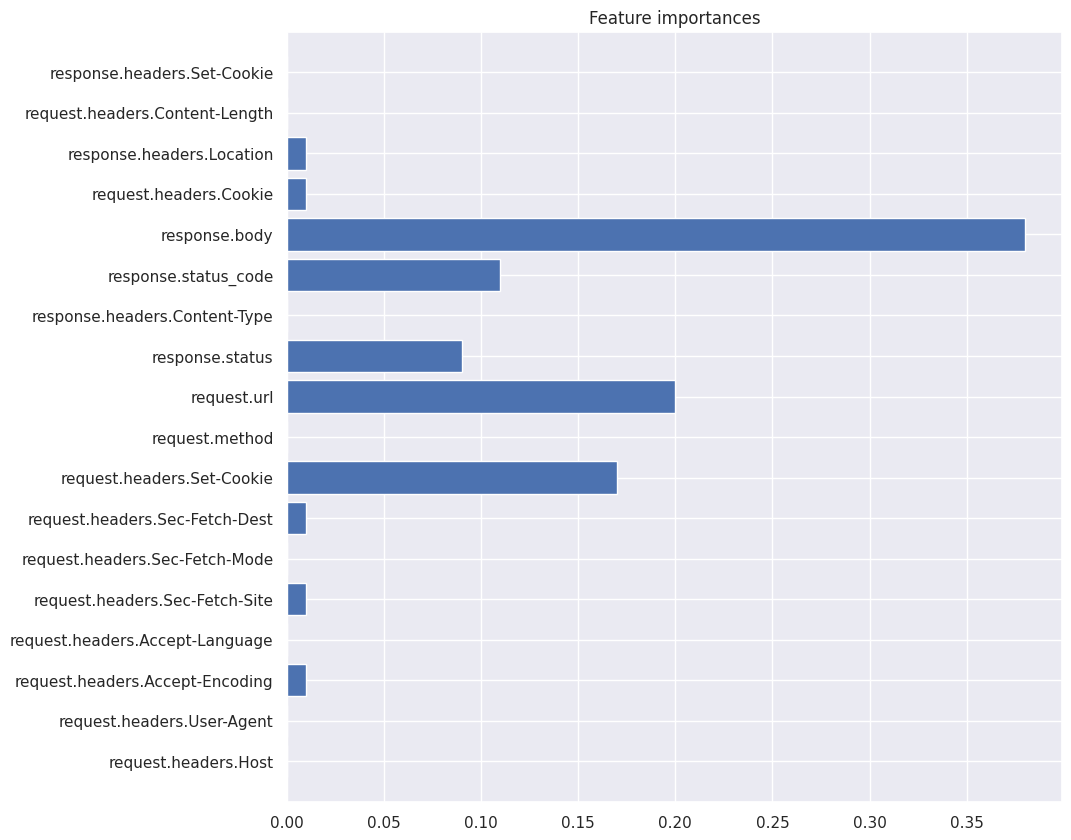

In [1009]:
# Feature selection with AdaBoost Classifier

abc_fs = AdaBoostClassifier(n_estimators=100, random_state=42)
abc_fs.fit(x_train_pca, y_train)

# Plot the feature importances of the forest
plot_feature_importance(abc_fs)

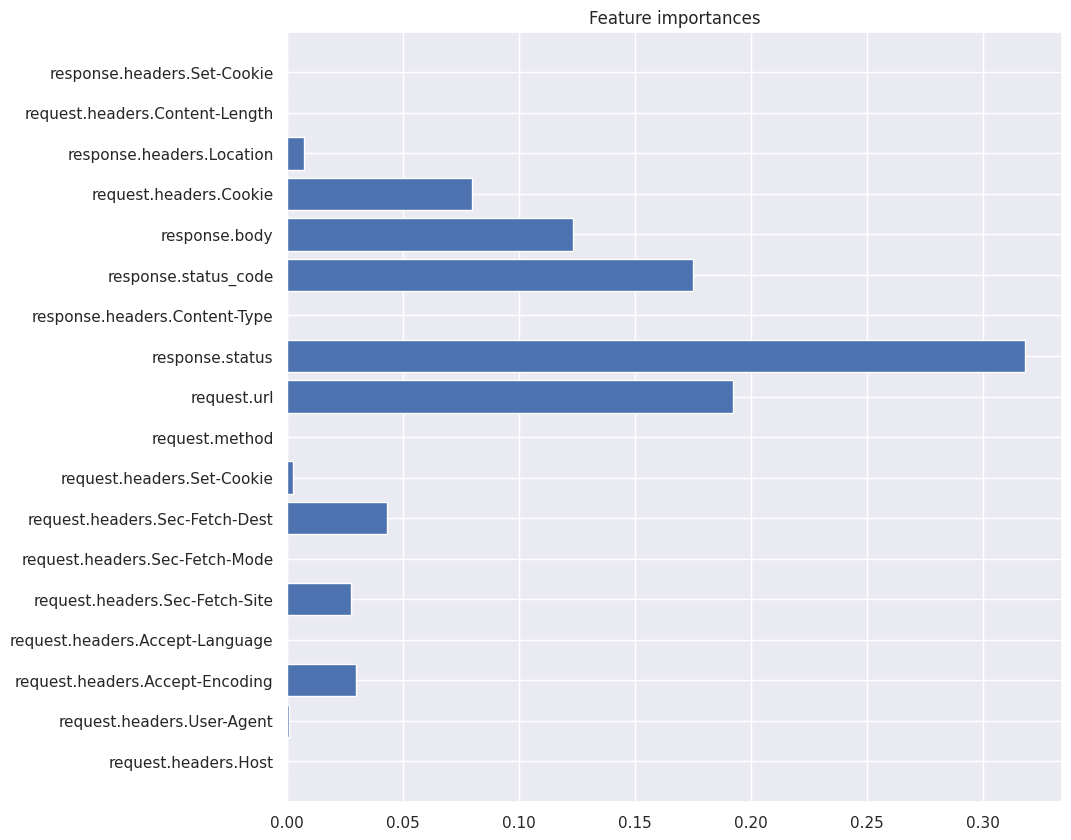

In [1010]:
# Feature selection with Gradient Boosting Classifier

gbc_fs = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc_fs.fit(x_train_pca, y_train)

# Plot the feature importances of the forest
plot_feature_importance(gbc_fs)

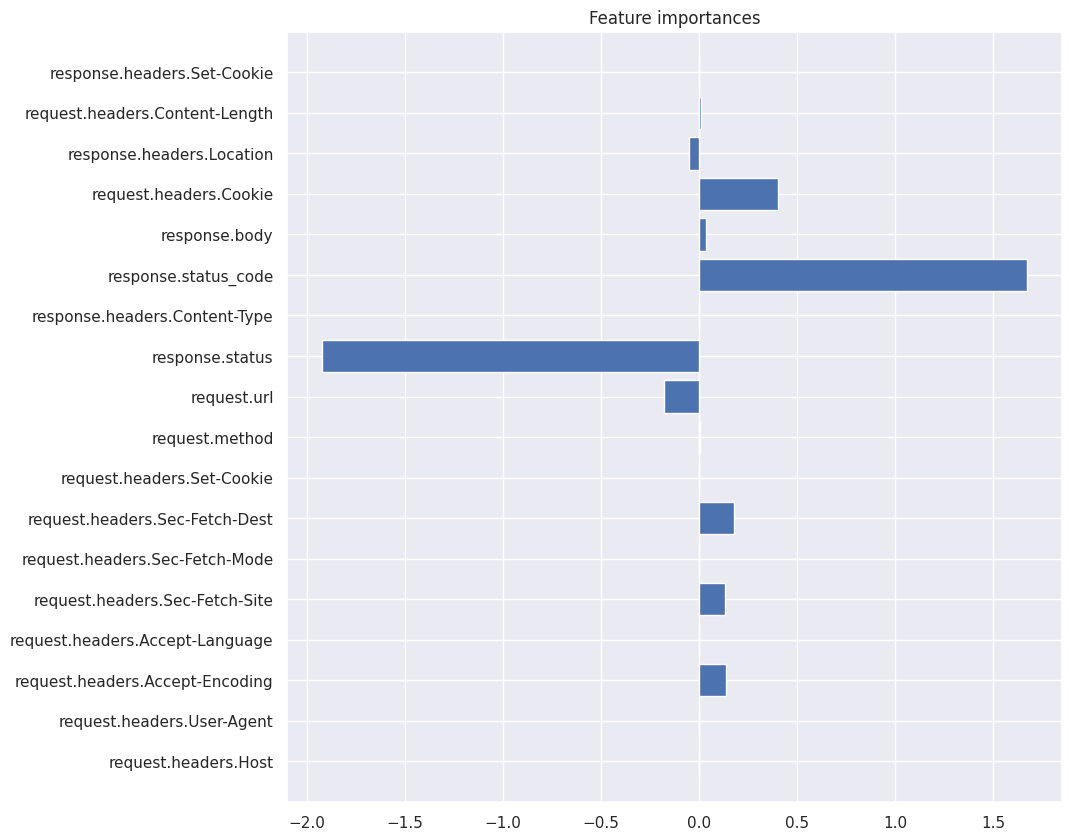

In [1011]:
# Feature importance with Linear SVC
 
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(x_train_pca, y_train)
lsvc.coef_

# Plot feature importance with Linear SVC
plt.figure(figsize=(10, 10))
plt.title("Feature importances")
plt.barh(range(x_train_pca.shape[1]), lsvc.coef_[0], align="center")
plt.yticks(np.arange(x_train_pca.shape[1]), features_list)
plt.ylim([-1, x_train_pca.shape[1]])
plt.show()


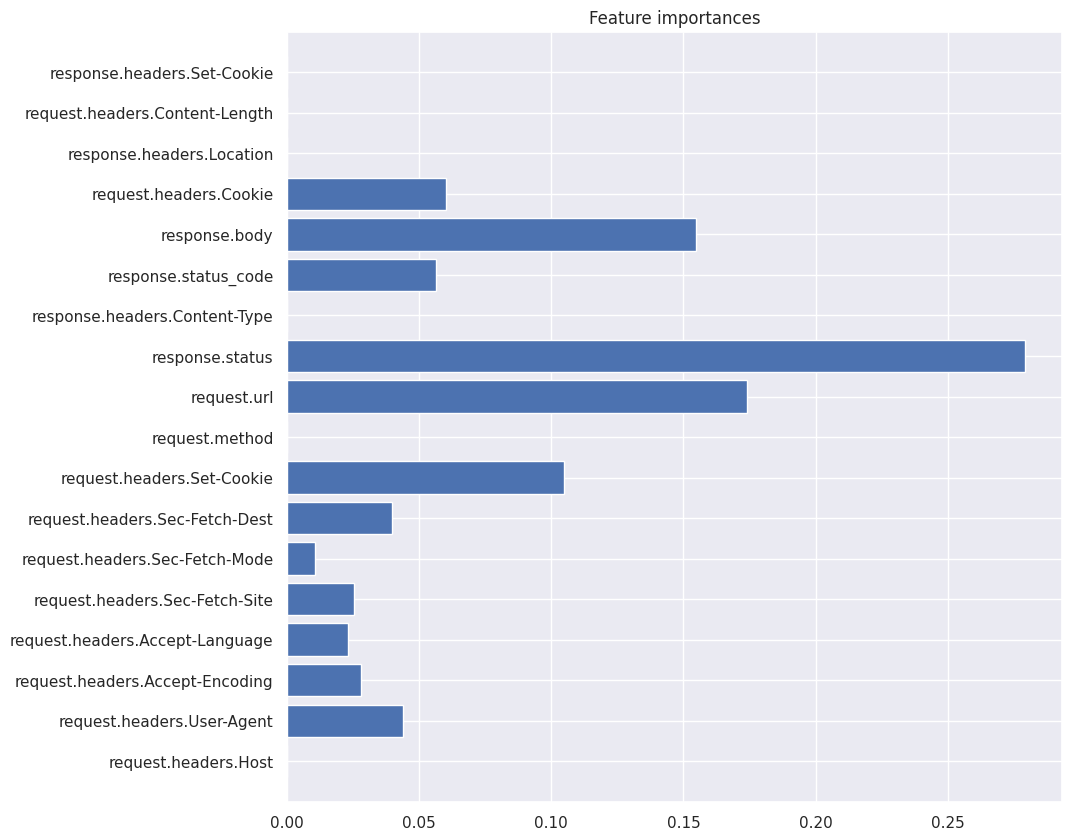

In [1012]:
# Feature selection with Decision Tree Classifier

dtc_fs = DecisionTreeClassifier(random_state=42)
dtc_fs.fit(x_train_pca, y_train)

plot_feature_importance(dtc_fs)

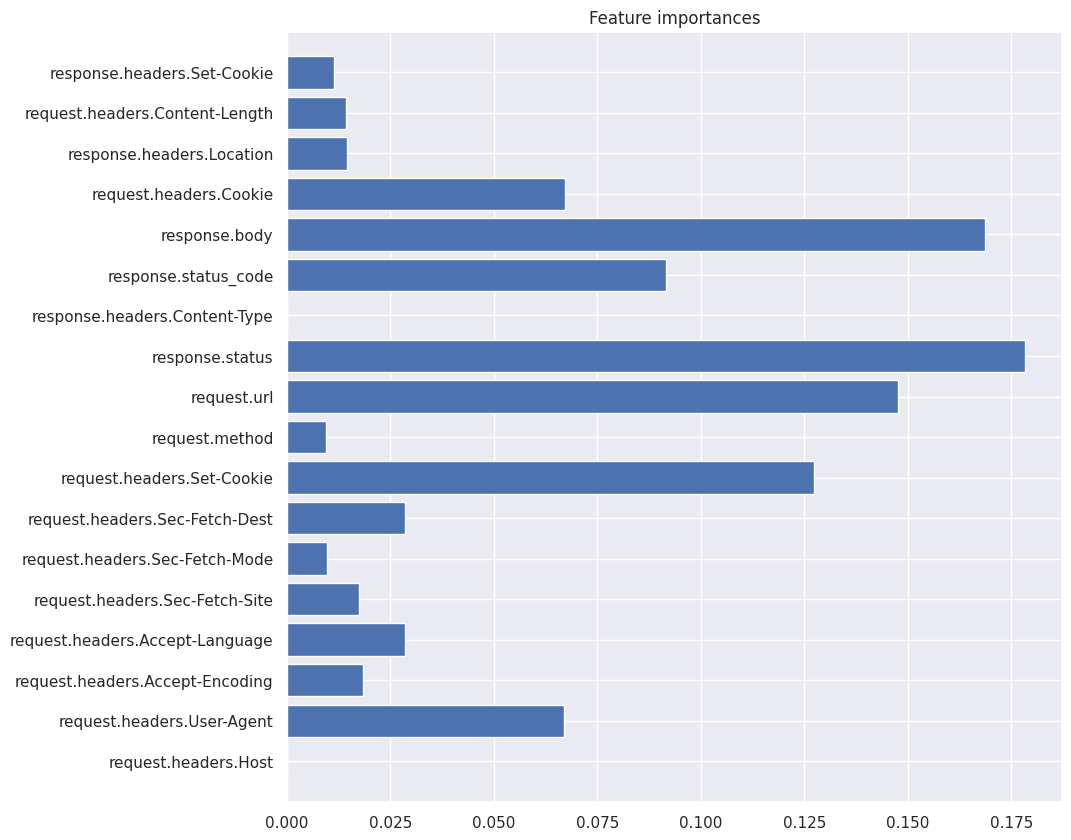

In [1013]:
# Feature selection with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

etc_fs = ExtraTreesClassifier(n_estimators=100, random_state=42)
etc_fs.fit(x_train_pca, y_train)

plot_feature_importance(etc_fs)

In [1014]:
# Print the feature ranking - Top 10
fs_table = pd.DataFrame(columns=['Feature', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'Linear SVC', 'Decision Tree', 'Extra Trees'])
fs_table['Feature'] = features_list
fs_table['Random Forest'] = rfc_fs.feature_importances_

fs_table['AdaBoost'] = abc_fs.feature_importances_
fs_table['Gradient Boosting'] = gbc_fs.feature_importances_
fs_table['Linear SVC'] = np.abs(lsvc.coef_[0])
fs_table['Decision Tree'] = dtc_fs.feature_importances_
fs_table['Extra Trees'] = etc_fs.feature_importances_

fs_table['Mean'] = fs_table.mean(axis=1)
fs_table.sort_values(by='Mean', ascending=False, inplace=True)
fs_table.head(15)

/tmp/ipykernel_89465/907717656.py:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,Feature,Random Forest,AdaBoost,Gradient Boosting,Linear SVC,Decision Tree,Extra Trees,Mean
10,response.status,0.155628,0.09,0.317976,1.923231,0.279180,0.178263,0.490713
12,response.status_code,0.138157,0.11,0.174995,1.669664,0.056443,0.091527,0.373464
9,request.url,0.182896,0.20,0.192191,0.181005,0.173912,0.147617,0.179603
13,response.body,0.155524,0.38,0.123388,0.034765,0.154585,0.168602,0.169477
14,request.headers.Cookie,0.045316,0.01,0.079570,0.403772,0.060056,0.067256,0.110995
7,request.headers.Set-Cookie,0.131813,0.17,0.002783,0.000000,0.104812,0.127421,0.089471
6,request.headers.Sec-Fetch-Dest,0.027921,0.01,0.043132,0.177926,0.039681,0.028503,0.054527
2,request.headers.Accept-Encoding,0.017887,0.01,0.029884,0.135648,0.027977,0.018431,0.039971
4,request.headers.Sec-Fetch-Site,0.018250,0.01,0.027686,0.129866,0.025411,0.017488,0.038117
1,request.headers.User-Agent,0.060500,0.00,0.000768,0.000000,0.044074,0.067019,0.028727


In [1015]:
# x_train_pca = x_train_pca[:, fs_table['Mean'].head(15).index]
# x_test_pca = x_test_pca[:, fs_table['Mean'].head(15).index]

Optimal number of features : 12


/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning:

The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.



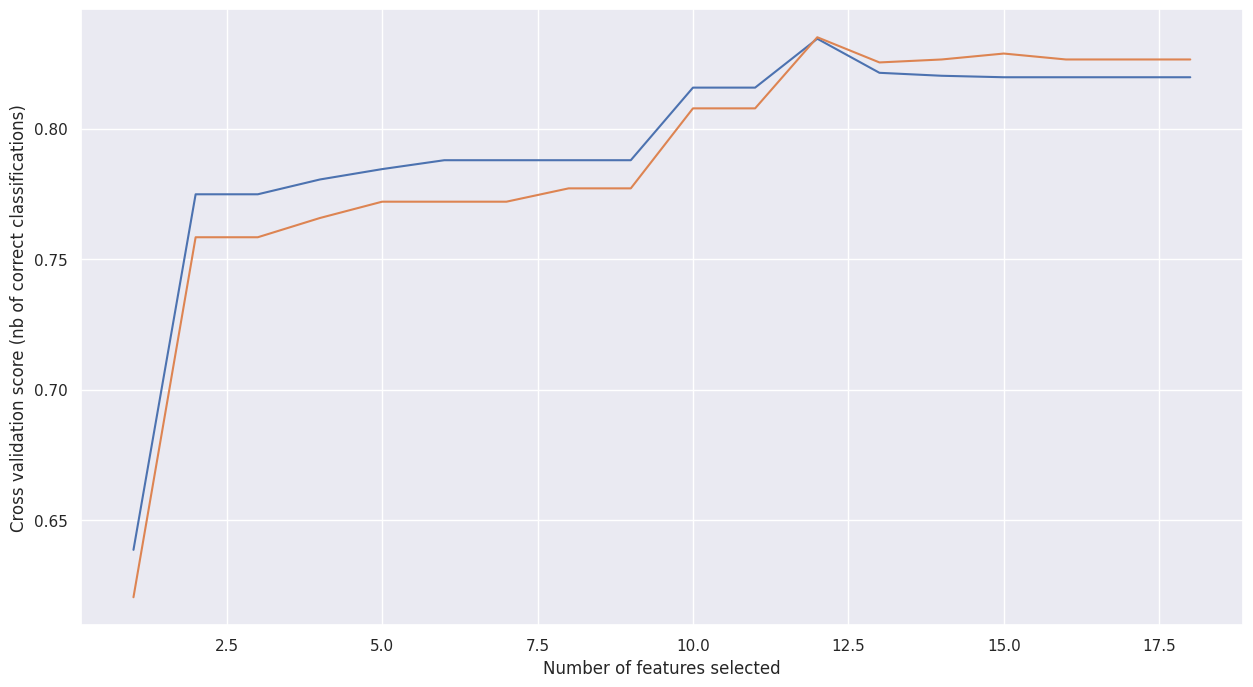

In [1016]:
# Feature selection

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=StratifiedKFold(2), scoring='accuracy')
rfecv.fit(x_train_pca, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

x_train_pca = rfecv.transform(x_train_pca)
x_test_pca = rfecv.transform(x_test_pca)

In [1017]:
def create_grid_search(model, params):
    # Create a grid search object which is used to find the best hyperparameters for the model
    return GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, verbose=3, cv=3, scoring='accuracy', return_train_score=True)

In [1018]:
# https://plotly.com/python/parallel-categories-diagram/

def plot_grid_search_results(results):

    df = pd.DataFrame(results)
    # Build parcats dimensions
    categorical_dimensions = [c for c in df.columns if "param_" in c]

    dimensions = [dict(values=df[label], label=label)for label in categorical_dimensions]

    # Build colorscale
    color = np.zeros(len(df), dtype='uint8')
    colorscale = [[0, 'gray'], [1, 'blue']]

    # Build figure as FigureWidget
    fig = go.FigureWidget(data=[go.Scatter(x=df['std_test_score'], y=df['mean_test_score'], marker={'color': 'gray'}, mode='markers', selected={'marker': {'color': 'blue'}}, unselected={'marker': {'opacity': 0.3}}), go.Parcats(domain={'y': [0, 0.4]}, dimensions=dimensions,line={'colorscale': colorscale, 'cmin': 0,'cmax': 1, 'color': color, 'shape': 'hspline'})])

    fig.update_layout(
        height=800, xaxis={'title': 'STD Score'},
        yaxis={'title': 'Mean Score', 'domain': [0.6, 1]},
        dragmode='lasso', hovermode='closest')

    # Update color callback
    def update_color(trace, points, state):
        # Update scatter selection
        fig.data[0].selectedpoints = points.point_inds

        # Update parcats colors
        new_color = np.zeros(len(df), dtype='uint8')
        new_color[points.point_inds] = 1
        fig.data[1].line.color = new_color

    # Register callback on scatter selection...
    fig.data[0].on_selection(update_color)
    # and parcats click
    fig.data[1].on_click(update_color)

    return fig

## Model choosing and fitting

In [1019]:
# Random forest is an ensemble learning method that uses multiple decision trees to make predictions.
# It is a robust and flexible model that can handle high-dimensional and complex data,
# making it a good choice for API classification tasks.

rf = RandomForestClassifier()
rf_param = {
    "n_estimators": [150, 250, 750],
    "criterion": ["gini", "entropy"],
    "max_depth": [20],
    "min_samples_split": [2],
    "random_state": [43],
}
rf_gcv = create_grid_search(rf, rf_param)

In [1020]:
rf_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=150, random_state=43;, score=(train=0.943, test=0.932) total time=   0.4s
[CV 3/3] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=150, random_state=43;, score=(train=0.936, test=0.942) total time=   0.5s
[CV 2/3] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=150, random_state=43;, score=(train=0.943, test=0.929) total time=   0.5s
[CV 1/3] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=250, random_state=43;, score=(train=0.943, test=0.932) total time=   0.6s
[CV 2/3] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=250, random_state=43;, score=(train=0.943, test=0.930) total time=   0.7s
[CV 3/3] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=250, random_state=43;, score=(train=0.936, test=0.942) total time=   0.8s
[CV 1/3] END criterion=entropy, ma

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [20],
                         'min_samples_split': [2],
                         'n_estimators': [150, 250, 750],
                         'random_state': [43]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [1021]:
# plot_grid_search_results(rf_gcv.cv_results_)

In [1022]:
print("Best parameters: ", rf_gcv.best_params_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150, 'random_state': 43}


In [1023]:
clf = rf_gcv.best_estimator_

In [1024]:
# Save the model
filename = "Model/"+str(dataset_number)+"/rf"+str(dataset_number)+"_model.sav"
pickle.dump(clf, open(filename, 'wb'))

              precision    recall  f1-score   support

      Benign    0.93388   0.95225   0.94298       356
     Malware    0.95674   0.94000   0.94830       400

    accuracy                        0.94577       756
   macro avg    0.94531   0.94612   0.94564       756
weighted avg    0.94598   0.94577   0.94579       756



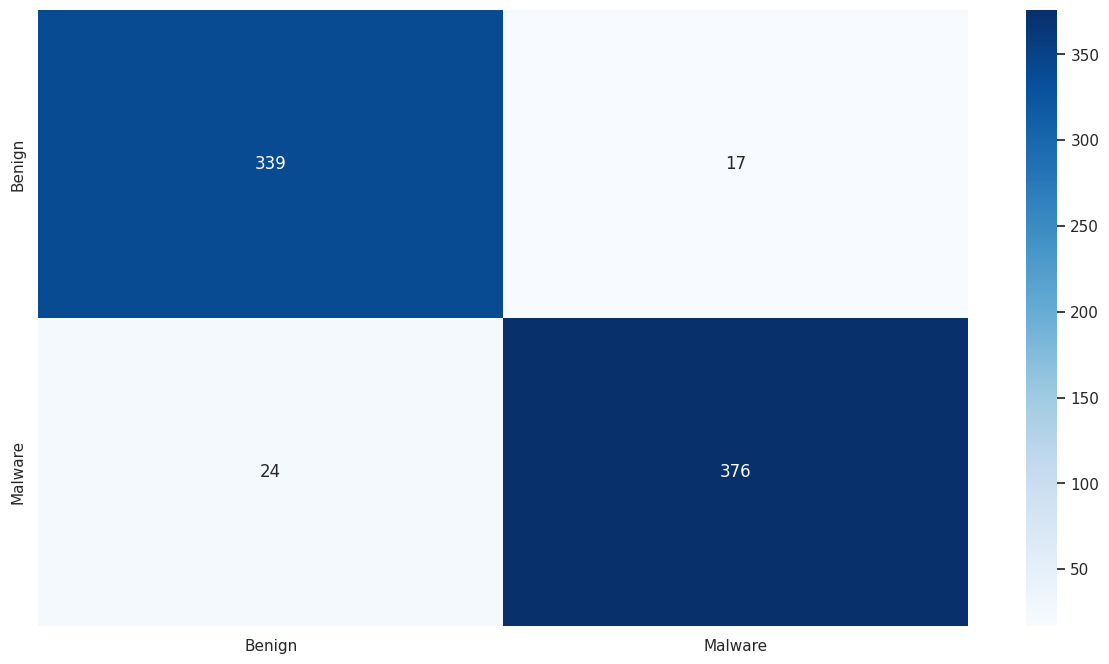

In [1025]:
show(clf)

In [1026]:
# Support vector machines are a popular choice for classification tasks, including API classification.
# They work by finding the hyperplane in a high-dimensional space that maximally
# separates different classes of data points.

svc = SVC(cache_size=500)
svc_param = {
    "C": [1, 2, 3],
    "kernel": ["poly", "rbf"],
    "probability": [True],
}
svc_gcv = create_grid_search(svc, svc_param)

In [1027]:
svc_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 2/3] END C=1, kernel=poly, probability=True;, score=(train=0.822, test=0.823) total time=   0.7s
[CV 3/3] END C=1, kernel=poly, probability=True;, score=(train=0.826, test=0.814) total time=   0.8s
[CV 1/3] END C=1, kernel=poly, probability=True;, score=(train=0.845, test=0.841) total time=   0.9s
[CV 1/3] END C=1, kernel=rbf, probability=True;, score=(train=0.876, test=0.863) total time=   1.3s
[CV 1/3] END C=2, kernel=poly, probability=True;, score=(train=0.853, test=0.846) total time=   0.7s
[CV 3/3] END C=1, kernel=rbf, probability=True;, score=(train=0.885, test=0.887) total time=   1.0s
[CV 2/3] END C=1, kernel=rbf, probability=True;, score=(train=0.891, test=0.890) total time=   1.0s
[CV 2/3] END C=2, kernel=poly, probability=True;, score=(train=0.855, test=0.855) total time=   0.7s
[CV 3/3] END C=2, kernel=poly, probability=True;, score=(train=0.853, test=0.852) total time=   0.8s
[CV 2/3] END C=2, kernel=rbf, prob

GridSearchCV(cv=3, estimator=SVC(cache_size=500), n_jobs=-1,
             param_grid={'C': [1, 2, 3], 'kernel': ['poly', 'rbf'],
                         'probability': [True]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [1028]:
# plot_grid_search_results(svc_gcv.cv_results_)

In [1029]:
print("Best parameters: ", svc_gcv.best_params_)

Best parameters:  {'C': 3, 'kernel': 'rbf', 'probability': True}


In [1030]:
svc = svc_gcv.best_estimator_

In [1031]:
# Save the model
filename = "Model/"+str(dataset_number)+"/svc"+str(dataset_number)+"_model.sav"
pickle.dump(svc, open(filename, 'wb'))

              precision    recall  f1-score   support

      Benign    0.95114   0.82022   0.88084       356
     Malware    0.85746   0.96250   0.90695       400

    accuracy                        0.89550       756
   macro avg    0.90430   0.89136   0.89390       756
weighted avg    0.90157   0.89550   0.89466       756



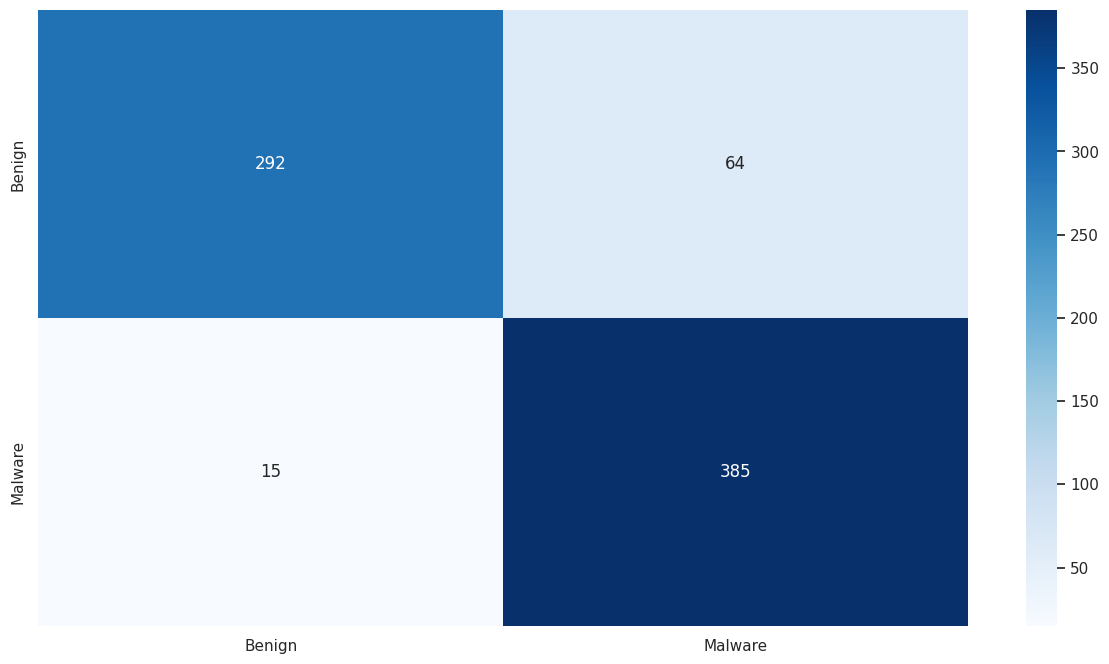

In [1032]:
show(svc)

In [1033]:
# Logistic regression is a simple yet effective linear model for classification tasks.
# It is particularly useful for predicting binary outcomes
# (e.g., malicious vs benign) and is often used as a baseline
# model for comparison with more complex models.

lr = LogisticRegression()
lr_param = {
    "C": [1, 2, 3],
    "penalty": ["l2"],
}
lr_gcv = create_grid_search(lr, lr_param)

In [1034]:
lr_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END C=1, penalty=l2;, score=(train=0.826, test=0.837) total time=   0.0s
[CV 3/3] END C=1, penalty=l2;, score=(train=0.845, test=0.841) total time=   0.0s
[CV 2/3] END C=2, penalty=l2;, score=(train=0.847, test=0.837) total time=   0.0s
[CV 2/3] END C=1, penalty=l2;, score=(train=0.828, test=0.824) total time=   0.0s
[CV 1/3] END C=2, penalty=l2;, score=(train=0.836, test=0.851) total time=   0.1s
[CV 1/3] END C=3, penalty=l2;, score=(train=0.836, test=0.852) total time=   0.0s
[CV 3/3] END C=2, penalty=l2;, score=(train=0.845, test=0.841) total time=   0.0s
[CV 2/3] END C=3, penalty=l2;, score=(train=0.838, test=0.828) total time=   0.0s
[CV 3/3] END C=3, penalty=l2;, score=(train=0.837, test=0.833) total time=   0.0s


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 2, 3], 'penalty': ['l2']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [1035]:
# plot_grid_search_results(lr_gcv.cv_results_)

In [1036]:
print("Best parameters: ", lr_gcv.best_params_)

Best parameters:  {'C': 2, 'penalty': 'l2'}


In [1037]:
lr = lr_gcv.best_estimator_

In [1038]:
# Save the model
filename = "Model/"+str(dataset_number)+"/lr"+str(dataset_number)+"_model.sav"
pickle.dump(lr, open(filename, 'wb'))

              precision    recall  f1-score   support

      Benign    0.89899   0.75000   0.81776       356
     Malware    0.80610   0.92500   0.86147       400

    accuracy                        0.84259       756
   macro avg    0.85255   0.83750   0.83962       756
weighted avg    0.84984   0.84259   0.84089       756



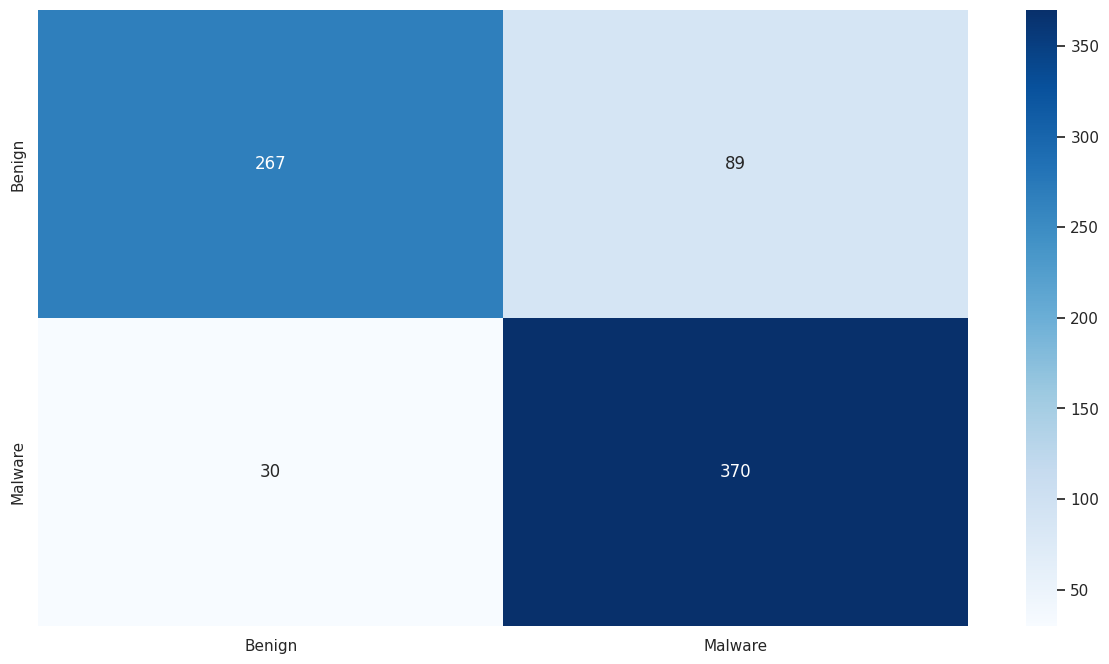

In [1039]:
show(lr)

In [1040]:
# KNN is a simple yet effective classification algorithm that works by finding the k nearest neighbors of a data point.
# It is a non-parametric model that does not make any assumptions about the underlying data distribution.

knn = KNeighborsClassifier()
knn_param = {
    "n_neighbors": [3 ,4, 5, 7, 9, 11, 13, 15],
    "weights": ["uniform", "distance"],
}
knn_gcv = create_grid_search(knn, knn_param)

In [1041]:
knn_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END n_neighbors=3, weights=distance;, score=(train=0.942, test=0.930) total time=   0.1s
[CV 2/3] END n_neighbors=3, weights=uniform;, score=(train=0.936, test=0.925) total time=   0.2s
[CV 1/3] END n_neighbors=3, weights=uniform;, score=(train=0.939, test=0.929) total time=   0.1s
[CV 3/3] END n_neighbors=3, weights=uniform;, score=(train=0.928, test=0.935) total time=   0.1s
[CV 2/3] END n_neighbors=3, weights=distance;, score=(train=0.940, test=0.926) total time=   0.1s
[CV 3/3] END n_neighbors=3, weights=distance;, score=(train=0.932, test=0.938) total time=   0.1s
[CV 1/3] END n_neighbors=4, weights=uniform;, score=(train=0.936, test=0.927) total time=   0.2s
[CV 1/3] END n_neighbors=4, weights=distance;, score=(train=0.942, test=0.929) total time=   0.1s
[CV 3/3] END n_neighbors=4, weights=uniform;, score=(train=0.929, test=0.940) total time=   0.1s
[CV 2/3] END n_neighbors=4, weights=uniform;, score=(train=0.9

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 4, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [1042]:
# plot_grid_search_results(knn_gcv.cv_results_)

In [1043]:
print("Best parameters: ", knn_gcv.best_params_)

Best parameters:  {'n_neighbors': 5, 'weights': 'distance'}


In [1044]:
knn = knn_gcv.best_estimator_

In [1045]:
# Save the model
filename = "Model/"+str(dataset_number)+"/knn"+str(dataset_number)+"_model.sav"
pickle.dump(knn, open(filename, 'wb'))

              precision    recall  f1-score   support

      Benign    0.93333   0.94382   0.93855       356
     Malware    0.94949   0.94000   0.94472       400

    accuracy                        0.94180       756
   macro avg    0.94141   0.94191   0.94164       756
weighted avg    0.94188   0.94180   0.94182       756



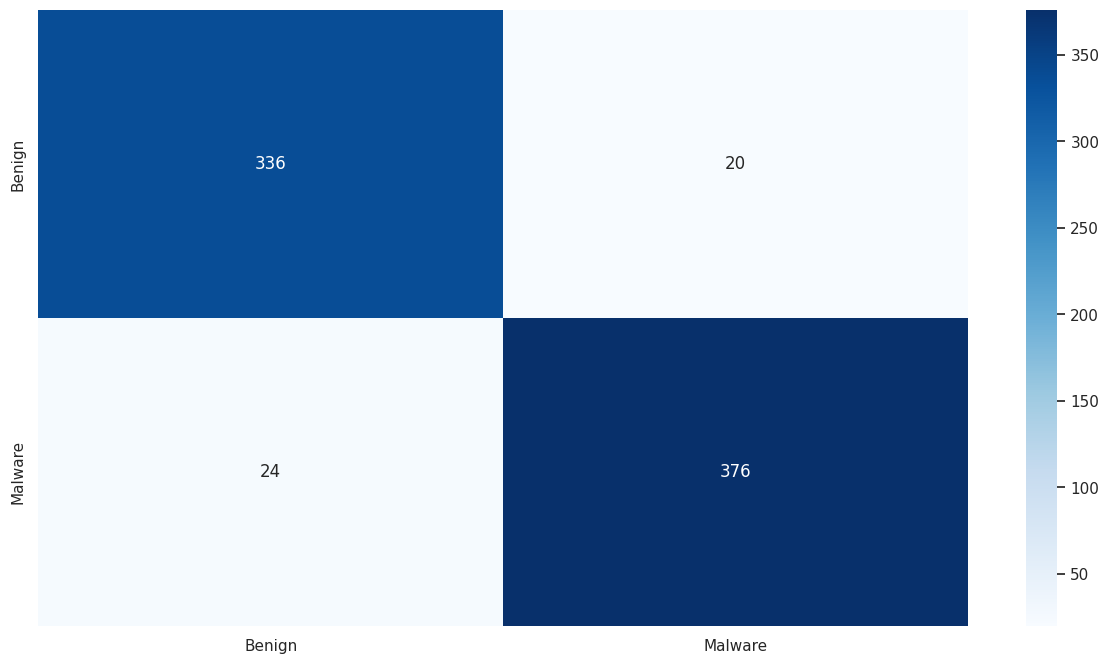

In [1046]:
show(knn)

In [1047]:
# Decision trees are a popular choice for classification tasks.
# They work by recursively partitioning the feature space into smaller and smaller regions,
# until each region contains only a single class of data points.

dt = DecisionTreeClassifier()
dt_param = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, 9, 11, 13, 15],
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10],
}
dt_gcv = create_grid_search(dt, dt_param)

In [1048]:
dt_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 126 candidates, totalling 378 fits
[CV 1/3] END criterion=gini, max_depth=3, min_samples_split=2;, score=(train=0.757, test=0.773) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=3, min_samples_split=2;, score=(train=0.766, test=0.755) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=3, min_samples_split=2;, score=(train=0.764, test=0.757) total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=3, min_samples_split=3;, score=(train=0.757, test=0.773) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=3, min_samples_split=3;, score=(train=0.766, test=0.755) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=3, min_samples_split=3;, score=(train=0.764, test=0.757) total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=3, min_samples_split=4;, score=(train=0.757, test=0.771) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=3, min_samples_split=4;, score=(train=0.766, test=0.755) total time=   0.0s
[CV 3/3] END crit

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11, 13, 15],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [1049]:
# plot_grid_search_results(dt_gcv.cv_results_)

In [1050]:
print("Best parameters: ", dt_gcv.best_params_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 2}


In [1051]:
dt = dt_gcv.best_estimator_

In [1052]:
# Save the model
filename = "Model/"+str(dataset_number)+"/dt"+str(dataset_number)+"_model.sav"
pickle.dump(dt, open(filename, 'wb'))

              precision    recall  f1-score   support

      Benign    0.92837   0.94663   0.93741       356
     Malware    0.95165   0.93500   0.94325       400

    accuracy                        0.94048       756
   macro avg    0.94001   0.94081   0.94033       756
weighted avg    0.94069   0.94048   0.94050       756



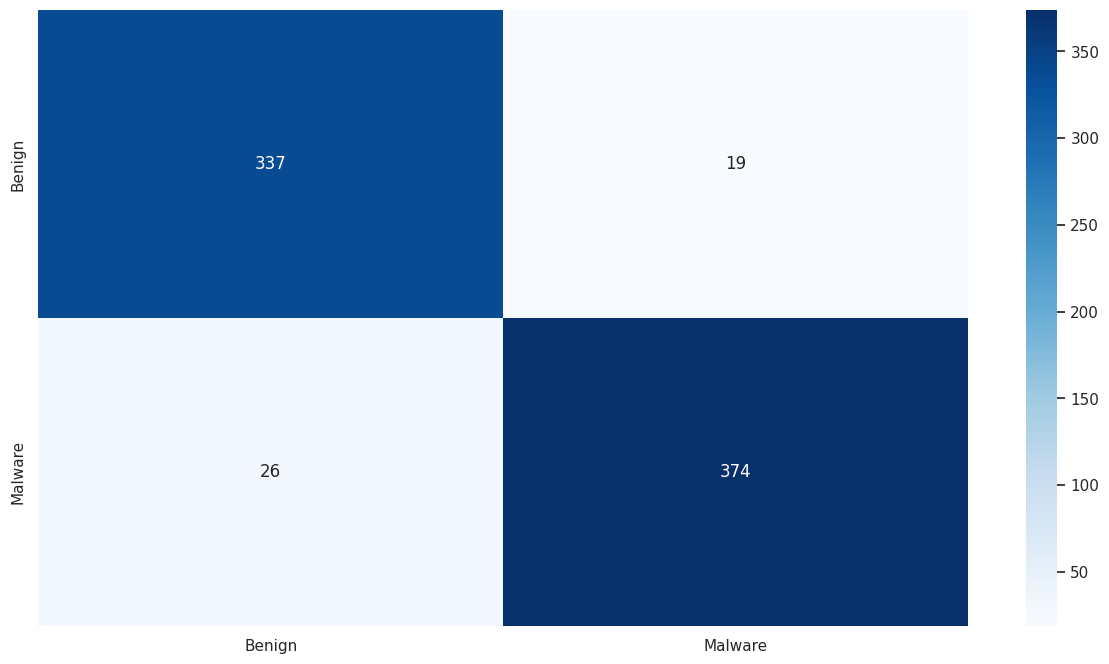

In [1053]:
show(dt)

In [1054]:
# AdaBoost is a popular ensemble method that works by combining the predictions of multiple weak learners.
# It is a simple way to improve the performance of a model by combining the predictions of multiple models.

abc = AdaBoostClassifier()
abc_param = {
    "n_estimators": [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    "learning_rate": [0.001, 0.01, 0.1, 1, 10, 100],
}
abc_gcv = create_grid_search(abc, abc_param)

In [1055]:
abc_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV 1/3] END learning_rate=0.001, n_estimators=50;, score=(train=0.745, test=0.764) total time=   0.2s
[CV 2/3] END learning_rate=0.001, n_estimators=50;, score=(train=0.751, test=0.751) total time=   0.2s
[CV 3/3] END learning_rate=0.001, n_estimators=50;, score=(train=0.757, test=0.739) total time=   0.2s
[CV 1/3] END learning_rate=0.001, n_estimators=100;, score=(train=0.745, test=0.764) total time=   0.4s
[CV 3/3] END learning_rate=0.001, n_estimators=100;, score=(train=0.757, test=0.739) total time=   0.5s
[CV 2/3] END learning_rate=0.001, n_estimators=100;, score=(train=0.751, test=0.751) total time=   0.6s
[CV 1/3] END learning_rate=0.001, n_estimators=150;, score=(train=0.745, test=0.764) total time=   0.7s
[CV 3/3] END learning_rate=0.001, n_estimators=150;, score=(train=0.757, test=0.739) total time=   0.5s
[CV 2/3] END learning_rate=0.001, n_estimators=150;, score=(train=0.751, test=0.751) total time=   0.8s
[CV 1

/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting

[CV 2/3] END learning_rate=100, n_estimators=150;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 3/3] END learning_rate=100, n_estimators=150;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 1/3] END learning_rate=100, n_estimators=200;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 2/3] END learning_rate=100, n_estimators=200;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 3/3] END learning_rate=100, n_estimators=200;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 1/3] END learning_rate=100, n_estimators=250;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 2/3] END learning_rate=100, n_estimators=250;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 3/3] END learning_rate=100, n_estimators=250;, score=(train=0.529, test=0.529) total time=   0.0s


/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting

[CV 1/3] END learning_rate=100, n_estimators=300;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 2/3] END learning_rate=100, n_estimators=300;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 3/3] END learning_rate=100, n_estimators=300;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 1/3] END learning_rate=100, n_estimators=350;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 2/3] END learning_rate=100, n_estimators=350;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 3/3] END learning_rate=100, n_estimators=350;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 1/3] END learning_rate=100, n_estimators=400;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 2/3] END learning_rate=100, n_estimators=400;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 3/3] END learning_rate=100, n_estimators=400;, score=(train=0.529, test=0.529) total time=   0.0s


/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting

[CV 1/3] END learning_rate=100, n_estimators=450;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 2/3] END learning_rate=100, n_estimators=450;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 3/3] END learning_rate=100, n_estimators=450;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 1/3] END learning_rate=100, n_estimators=500;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 2/3] END learning_rate=100, n_estimators=500;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 3/3] END learning_rate=100, n_estimators=500;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 1/3] END learning_rate=10, n_estimators=500;, score=(train=0.255, test=0.236) total time=   2.0s


/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting

[CV 2/3] END learning_rate=10, n_estimators=500;, score=(train=0.249, test=0.249) total time=   2.4s
[CV 3/3] END learning_rate=10, n_estimators=500;, score=(train=0.243, test=0.261) total time=   1.9s


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [1056]:
# plot_grid_search_results(abc_gcv.cv_results_)

In [1057]:
print("Best parameters: ", abc_gcv.best_params_)

Best parameters:  {'learning_rate': 1, 'n_estimators': 350}


In [1058]:
abc = abc_gcv.best_estimator_

In [1059]:
# Save the model
filename = "Model/"+str(dataset_number)+"/abc"+str(dataset_number)+"_model.sav"
pickle.dump(abc, open(filename, 'wb'))

              precision    recall  f1-score   support

      Benign    0.94970   0.90169   0.92507       356
     Malware    0.91627   0.95750   0.93643       400

    accuracy                        0.93122       756
   macro avg    0.93299   0.92959   0.93075       756
weighted avg    0.93201   0.93122   0.93108       756



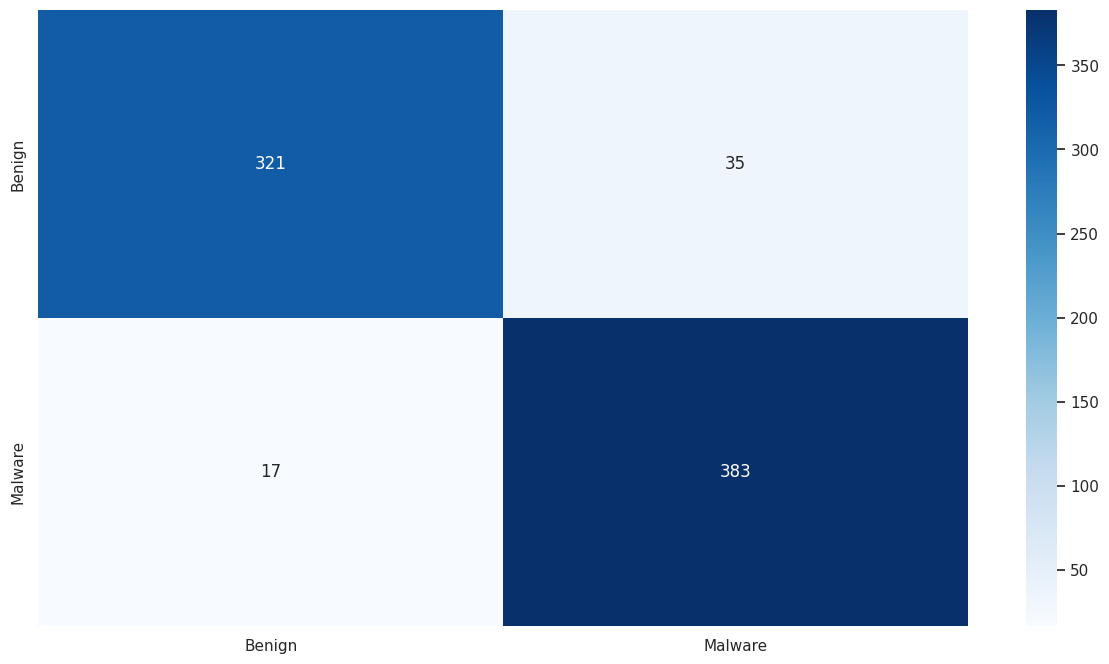

In [1060]:
show(abc)

In [1061]:
# Gradient Boosting is a popular ensemble method that works by combining the predictions of multiple weak learners.
# It is a simple way to improve the performance of a model by combining the predictions of multiple models.

gbc = GradientBoostingClassifier()
gbc_param = {
    "n_estimators": [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    "learning_rate": [0.001, 0.01, 0.1, 1, 10, 100],
}
gbc_gcv = create_grid_search(gbc, gbc_param)

In [1062]:
gbc_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV 2/3] END learning_rate=0.001, n_estimators=50;, score=(train=0.529, test=0.529) total time=   0.1s
[CV 1/3] END learning_rate=0.001, n_estimators=50;, score=(train=0.529, test=0.529) total time=   0.1s
[CV 3/3] END learning_rate=0.001, n_estimators=50;, score=(train=0.529, test=0.529) total time=   0.1s
[CV 1/3] END learning_rate=0.001, n_estimators=100;, score=(train=0.761, test=0.775) total time=   0.3s
[CV 3/3] END learning_rate=0.001, n_estimators=100;, score=(train=0.764, test=0.757) total time=   0.3s
[CV 2/3] END learning_rate=0.001, n_estimators=100;, score=(train=0.766, test=0.755) total time=   0.3s
[CV 1/3] END learning_rate=0.001, n_estimators=150;, score=(train=0.761, test=0.775) total time=   0.6s
[CV 2/3] END learning_rate=0.001, n_estimators=150;, score=(train=0.766, test=0.755) total time=   0.4s
[CV 3/3] END learning_rate=0.001, n_estimators=150;, score=(train=0.764, test=0.757) total time=   0.4s
[CV 2

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [1063]:
# plot_grid_search_results(gbc_gcv.cv_results_)

In [1064]:
print("Best parameters: ", gbc_gcv.best_params_)

Best parameters:  {'learning_rate': 0.1, 'n_estimators': 500}


In [1065]:
gbc = gbc_gcv.best_estimator_

In [1066]:
# Save the model
filename = "Model/"+str(dataset_number)+"/gbc"+str(dataset_number)+"_model.sav"
pickle.dump(gbc, open(filename, 'wb'))

              precision    recall  f1-score   support

      Benign    0.93388   0.95225   0.94298       356
     Malware    0.95674   0.94000   0.94830       400

    accuracy                        0.94577       756
   macro avg    0.94531   0.94612   0.94564       756
weighted avg    0.94598   0.94577   0.94579       756



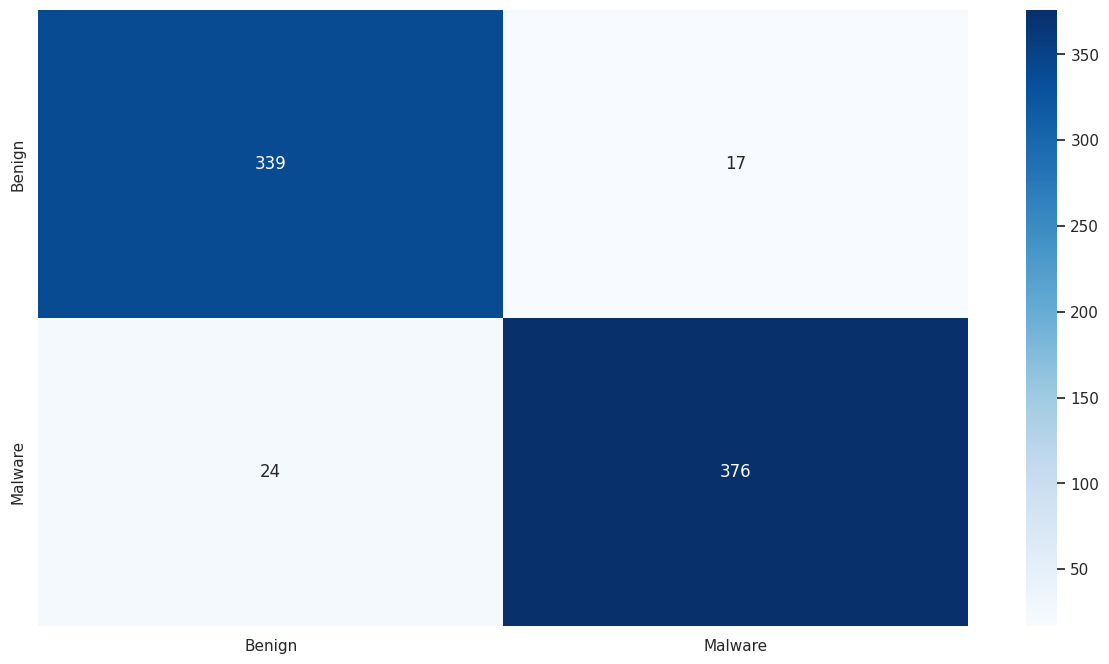

In [1067]:
show(gbc)

In [1068]:
# Neural networks are a popular choice for classification tasks.
# They work by learning the weights of the connections between neurons in the network.

mlp = MLPClassifier()
mlp_param = {
    "hidden_layer_sizes": [(100, 100, 100), (100, 100, 100, 100), (100, 100, 100, 100, 100), (100, 100, 100, 100, 100, 100)],
    "activation": ["relu"],
    "solver": ["adam"],
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1],
    "learning_rate": ["constant", "invscaling", "adaptive"],
    "early_stopping": [True],
}
mlp_gcv = create_grid_search(mlp, mlp_param)

In [1069]:
mlp_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV 2/3] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, solver=adam;, score=(train=0.900, test=0.891) total time=   1.3s
[CV 1/3] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, solver=adam;, score=(train=0.895, test=0.891) total time=   1.5s
[CV 1/3] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(100, 100, 100), learning_rate=invscaling, solver=adam;, score=(train=0.891, test=0.891) total time=   2.4s
[CV 2/3] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(100, 100, 100), learning_rate=invscaling, solver=adam;, score=(train=0.890, test=0.889) total time=   1.5s
[CV 3/3] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, solver=adam;, score=(train=0.896, test=0.905) tot

GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'early_stopping': [True],
                         'hidden_layer_sizes': [(100, 100, 100),
                                                (100, 100, 100, 100),
                                                (100, 100, 100, 100, 100),
                                                (100, 100, 100, 100, 100, 100)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['adam']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [1070]:
# plot_grid_search_results(mlp_gcv.cv_results_)

In [1071]:
print("Best parameters: ", mlp_gcv.best_params_)

Best parameters:  {'activation': 'relu', 'alpha': 0.01, 'early_stopping': True, 'hidden_layer_sizes': (100, 100, 100, 100, 100, 100), 'learning_rate': 'constant', 'solver': 'adam'}


In [1072]:
mlp = mlp_gcv.best_estimator_

In [1073]:
# Save the model
filename = "Model/"+str(dataset_number)+"/mlp"+str(dataset_number)+"_model.sav"
pickle.dump(mlp, open(filename, 'wb'))

              precision    recall  f1-score   support

      Benign    0.94637   0.84270   0.89153       356
     Malware    0.87244   0.95750   0.91299       400

    accuracy                        0.90344       756
   macro avg    0.90940   0.90010   0.90226       756
weighted avg    0.90725   0.90344   0.90289       756



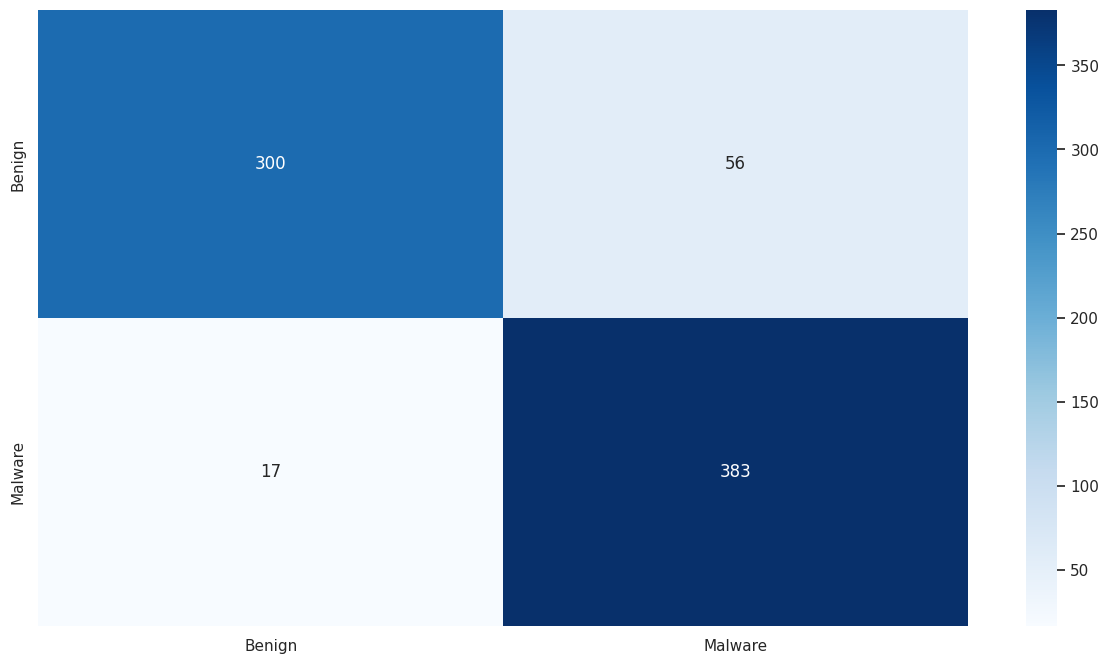

In [1074]:
show(mlp)

In [1075]:
# Voting classifier is a meta-classifier that combines the predictions of multiple classifiers.
# It is a simple way to improve the performance of a model by combining the predictions of multiple models.

vc = VotingClassifier(estimators=[("clf",clf),("svc",svc),("lr",lr),("knn",knn),("dt",dt),("abc",abc),("gbc",gbc),("mlp",mlp)])
vc_param = {
    "weights": [[1,1,1,1,1,1,1,1], [2,1,1,1,1,1,1,1], [1,2,1,1,1,1,1,1], [1,1,2,1,1,1,1,1], [1,1,1,2,1,1,1,1], [1,1,1,1,2,1,1,1], [1,1,1,1,1,2,1,1], [1,1,1,1,1,1,2,1], [1,1,1,1,1,1,1,2]],
    "voting": ["hard", "soft"],
}
vc_gcv = create_grid_search(vc, vc_param)

In [1076]:
vc_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 2/3] END voting=hard, weights=[1, 1, 1, 1, 1, 1, 1, 1];, score=(train=0.943, test=0.934) total time=   8.6s
[CV 1/3] END voting=hard, weights=[1, 1, 1, 1, 1, 1, 1, 1];, score=(train=0.943, test=0.933) total time=   9.0s
[CV 1/3] END voting=hard, weights=[2, 1, 1, 1, 1, 1, 1, 1];, score=(train=0.943, test=0.933) total time=   9.9s
[CV 3/3] END voting=hard, weights=[1, 1, 1, 1, 1, 1, 1, 1];, score=(train=0.936, test=0.946) total time=  10.7s
[CV 3/3] END voting=hard, weights=[2, 1, 1, 1, 1, 1, 1, 1];, score=(train=0.936, test=0.946) total time=   7.3s
[CV 2/3] END voting=hard, weights=[2, 1, 1, 1, 1, 1, 1, 1];, score=(train=0.943, test=0.935) total time=   8.5s
[CV 2/3] END voting=hard, weights=[1, 2, 1, 1, 1, 1, 1, 1];, score=(train=0.939, test=0.928) total time=   7.7s
[CV 1/3] END voting=hard, weights=[1, 2, 1, 1, 1, 1, 1, 1];, score=(train=0.942, test=0.930) total time=  10.6s
[CV 3/3] END voting=hard, weights=[1, 2, 1,

GridSearchCV(cv=3,
             estimator=VotingClassifier(estimators=[('clf',
                                                     RandomForestClassifier(criterion='entropy',
                                                                            max_depth=20,
                                                                            n_estimators=150,
                                                                            random_state=43)),
                                                    ('svc',
                                                     SVC(C=3, cache_size=500,
                                                         probability=True)),
                                                    ('lr',
                                                     LogisticRegression(C=2)),
                                                    ('knn',
                                                     KNeighborsClassifier(weights='distance')),
                                                    ('dt',
                                                     DecisionTreeClassifier(criterion='entropy',
                                                                            max_depth=15)),
                                                    ('...
                                                     MLPClassifier(alpha=0.01,
                                                                   early_stopping=True,
                                                                   hidden_layer_sizes=(100,
                                                                                       100,
                                                                                       100,
                                                                                       100,
                                                                                       100,
                                                                                       100)))]),
             n_jobs=-1,
             param_grid={'voting': ['hard', 'soft'],
                         'weights': [[1, 1, 1, 1, 1, 1, 1, 1],
                                     [2, 1, 1, 1, 1, 1, 1, 1],
                                     [1, 2, 1, 1, 1, 1, 1, 1],
                                     [1, 1, 2, 1, 1, 1, 1, 1],
                                     [1, 1, 1, 2, 1, 1, 1, 1],
                                     [1, 1, 1, 1, 2, 1, 1, 1],
                                     [1, 1, 1, 1, 1, 2, 1, 1],
                                     [1, 1, 1, 1, 1, 1, 2, 1],
                                     [1, 1, 1, 1, 1, 1, 1, 2]]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [1077]:
# plot_grid_search_results(vc_gcv.cv_results_)

In [1078]:
print("Best parameters: ", vc_gcv.best_params_)

Best parameters:  {'voting': 'hard', 'weights': [1, 1, 1, 1, 2, 1, 1, 1]}


In [1079]:
vc = vc_gcv.best_estimator_

In [1080]:
# Save the model
filename = "Model/"+str(dataset_number)+"/vc"+str(dataset_number)+"_model.sav"
pickle.dump(vc, open(filename, 'wb'))

              precision    recall  f1-score   support

      Benign    0.93352   0.94663   0.94003       356
     Malware    0.95190   0.94000   0.94591       400

    accuracy                        0.94312       756
   macro avg    0.94271   0.94331   0.94297       756
weighted avg    0.94324   0.94312   0.94314       756



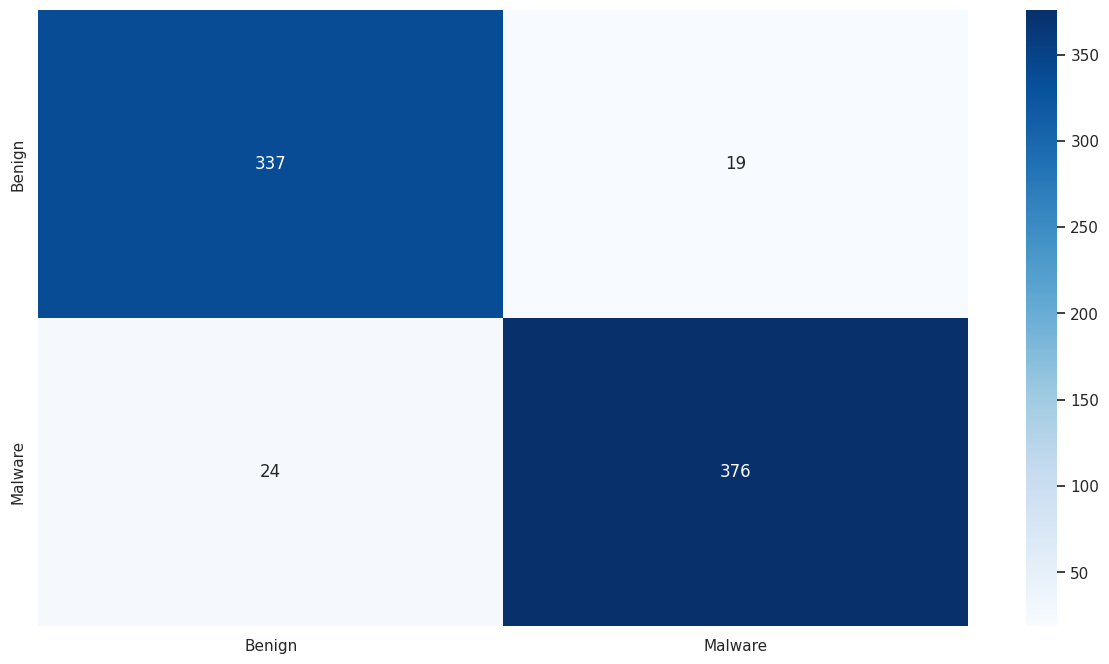

In [1081]:
show(vc)

In [1082]:
# Stacking classifier is a meta-classifier that combines the predictions of multiple classifiers.
# It is a simple way to improve the performance of a model by combining the predictions of multiple models.

sc = StackingClassifier(estimators=[("clf",clf),("svc",svc),("lr",lr),("knn",knn),("dt",dt),("abc",abc),("gbc",gbc),("mlp",mlp)], final_estimator=LogisticRegression())
sc_param = {
    "final_estimator__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}
sc_gcv = create_grid_search(sc, sc_param)

In [1083]:
# Print size of x_train_pca
print(x_train_pca.shape)


(3526, 12)


In [1084]:
sc_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV 3/3] END final_estimator__C=0.001;, score=(train=0.936, test=0.946) total time=  38.8s
[CV 2/3] END final_estimator__C=0.001;, score=(train=0.943, test=0.934) total time=  40.1s
[CV 1/3] END final_estimator__C=0.001;, score=(train=0.943, test=0.933) total time=  44.0s
[CV 1/3] END final_estimator__C=0.01;, score=(train=0.942, test=0.932) total time=  44.3s
[CV 2/3] END final_estimator__C=0.01;, score=(train=0.943, test=0.935) total time=  40.7s
[CV 2/3] END final_estimator__C=0.1;, score=(train=0.943, test=0.935) total time=  40.0s
[CV 3/3] END final_estimator__C=0.01;, score=(train=0.936, test=0.944) total time=  45.9s
[CV 1/3] END final_estimator__C=0.1;, score=(train=0.943, test=0.933) total time=  43.0s
[CV 3/3] END final_estimator__C=0.1;, score=(train=0.936, test=0.945) total time=  47.4s
[CV 2/3] END final_estimator__C=1;, score=(train=0.943, test=0.935) total time=  48.8s
[CV 3/3] END final_estimator__C=1;, score=(

/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END final_estimator__C=1000;, score=(train=0.936, test=0.948) total time=  27.0s


GridSearchCV(cv=3,
             estimator=StackingClassifier(estimators=[('clf',
                                                       RandomForestClassifier(criterion='entropy',
                                                                              max_depth=20,
                                                                              n_estimators=150,
                                                                              random_state=43)),
                                                      ('svc',
                                                       SVC(C=3, cache_size=500,
                                                           probability=True)),
                                                      ('lr',
                                                       LogisticRegression(C=2)),
                                                      ('knn',
                                                       KNeighborsClassifier(weights='distance')),
                                                      ('dt',
                                                       DecisionTreeClassifier(criterion='entropy',
                                                                              max_depth=15)),...
                                                       AdaBoostClassifier(learning_rate=1,
                                                                          n_estimators=350)),
                                                      ('gbc',
                                                       GradientBoostingClassifier(n_estimators=500)),
                                                      ('mlp',
                                                       MLPClassifier(alpha=0.01,
                                                                     early_stopping=True,
                                                                     hidden_layer_sizes=(100,
                                                                                         100,
                                                                                         100,
                                                                                         100,
                                                                                         100,
                                                                                         100)))],
                                          final_estimator=LogisticRegression()),
             n_jobs=-1,
             param_grid={'final_estimator__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                1000]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [1085]:
# plot_grid_search_results(sc_gcv.cv_results_)

In [1086]:
print("Best parameters: ", sc_gcv.best_params_)

Best parameters:  {'final_estimator__C': 10}


In [1087]:
sc = sc_gcv.best_estimator_

In [1088]:
# Save the model
filename = "Model/"+str(dataset_number)+"/sc"+str(dataset_number)+"_model.sav"
pickle.dump(sc, open(filename, 'wb'))

              precision    recall  f1-score   support

      Benign    0.93388   0.95225   0.94298       356
     Malware    0.95674   0.94000   0.94830       400

    accuracy                        0.94577       756
   macro avg    0.94531   0.94612   0.94564       756
weighted avg    0.94598   0.94577   0.94579       756



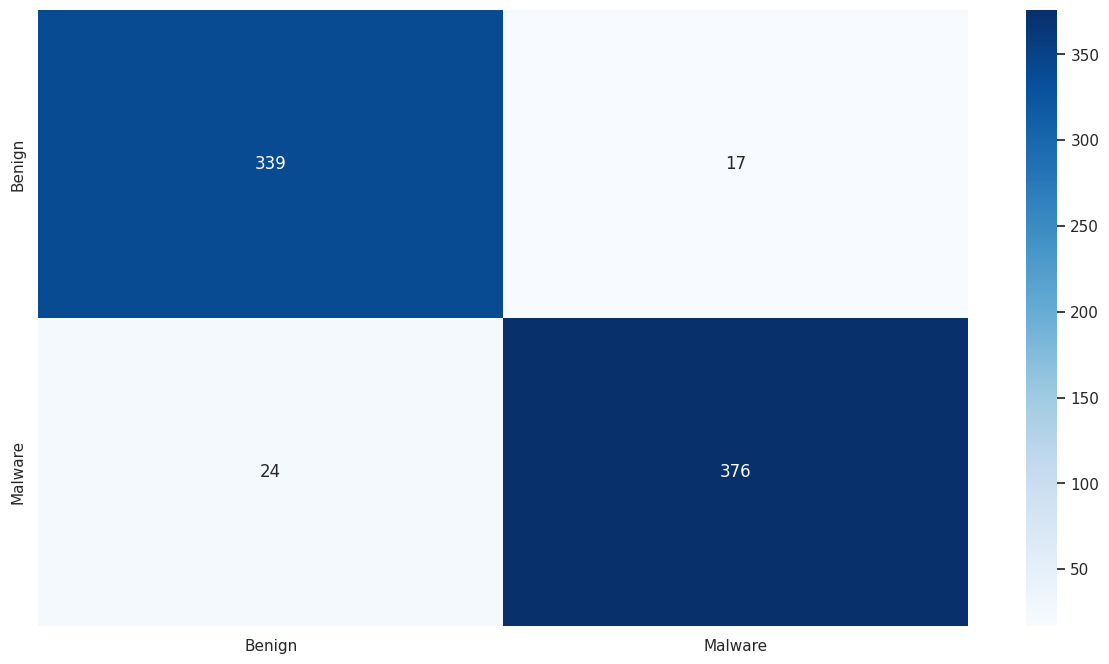

In [1089]:
show(sc)

In [1090]:
# Choose the best model

models = [clf,svc,lr,knn,dt,abc,gbc,mlp,vc,sc]
model_names = ["Random Forest","SVM","Logistic Regression","KNN","Decision Tree","AdaBoost","Gradient Boosting","Neural Network","Voting Classifier","Stacking Classifier"]
model_scores = []

for model in models:
    predictions = model.predict(x_test_pca)
    true_labels = y_test
    model_report = classification_report(true_labels, predictions, digits=5)
    model_scores.append(model_report.split()[12])

best_model = models[model_scores.index(max(model_scores))]
best_model_name = model_names[model_scores.index(max(model_scores))]
best_model_score = max(model_scores)
print("Best model: " + best_model_name)
print("Score: " + str(best_model_score))
model_report = classification_report(true_labels, predictions, digits=5)
print(model_report)

Best model: Random Forest
Score: 0.94830
              precision    recall  f1-score   support

      Benign    0.93388   0.95225   0.94298       356
     Malware    0.95674   0.94000   0.94830       400

    accuracy                        0.94577       756
   macro avg    0.94531   0.94612   0.94564       756
weighted avg    0.94598   0.94577   0.94579       756



## Result printout

In [1091]:
def show(model):
    # We print our results
    sns.set(rc={'figure.figsize': (15, 8)})
    predictions = model.predict(x_test_pca)
    true_labels = y_test
    cf_matrix = confusion_matrix(true_labels, predictions)
    model_report = classification_report(true_labels, predictions, digits=5)
    heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))

    # The heatmap is cool but this is the most important result
    print(model_report)

# Test

In [1092]:
# Now it's your turn, use the model you have just created :)

# Read the valuation json, preprocess it and run your model
with open(f'./dataset_{str(dataset_number)}_val.json') as file:
    raw_ds = json.load(file)
test_df = pd.json_normalize(raw_ds, max_level=2)

# Preprocess the validation dataset, remember that here you don't have the labels
test_df.fillna(' ', inplace=True)
test_df = vectorize_df(test_df)

# Predict with your model and use rfecv to select the best features
X = test_df[features_list].to_numpy()
X = rfecv.transform(X)
predictions = sc.predict(X)

# Save your predictions

In [1095]:
# Save your preditions
enc = LabelEncoder()
np.savetxt(f'./dataset_{str(dataset_number)}_{test_type}_result.txt', enc.fit_transform(predictions), fmt='%2d')